### Practice Suggestions

- Implement and compare SGD, Momentum, RMSProp, and Adam on a sample dataset.

- Visualize training loss and accuracy curves.

- Experiment with different learning rates and batch sizes.

- Use learning rate schedules and early stopping callbacks.

- Analyze the effect of weight initialization on training dynamics.

1. Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks, initializers
import matplotlib.pyplot as plt



2. Loading the dataset(using CIFAR-10)

In [2]:
# 1️⃣ Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 90s 1us/step


3. Defining model architecture

In [8]:
def create_cifar10_model(initializer='glorot_uniform'):
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),   # ✅ Explicit input layer
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


4. Setting call backs for early stopping

In [9]:
# 3️⃣ Callbacks: Early stopping + LR schedule
def get_callbacks():
    return [
        callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
    ]



5. Training function

In [14]:
def train_model(optimizer_fn, lr=0.001, batch_size=64, initializer='glorot_uniform'):
    model = create_cifar10_model(initializer)
    optimizer = optimizer_fn(lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        x_train, y_train,
        epochs=25,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=get_callbacks(),
        verbose=0
    )
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return history, test_acc


6. Defining Experiments

In [15]:
experiments = {
    'SGD': lambda: train_model(lambda lr: tf.keras.optimizers.SGD(learning_rate=lr), lr=0.01),
    'SGD + Momentum': lambda: train_model(lambda lr: tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9), lr=0.01),
    'RMSProp': lambda: train_model(lambda lr: tf.keras.optimizers.RMSprop(learning_rate=lr), lr=0.001),
    'Adam': lambda: train_model(lambda lr: tf.keras.optimizers.Adam(learning_rate=lr), lr=0.001)
}


7. Run the experiments

In [16]:
# 6️⃣ Run experiments
histories = {}
results = {}

for name, func in experiments.items():
    print(f"Training with {name}...")
    history, test_acc = func()
    histories[name] = history
    results[name] = test_acc



Training with SGD...
Training with SGD + Momentum...
Training with RMSProp...
Training with Adam...


8. Plotting the function

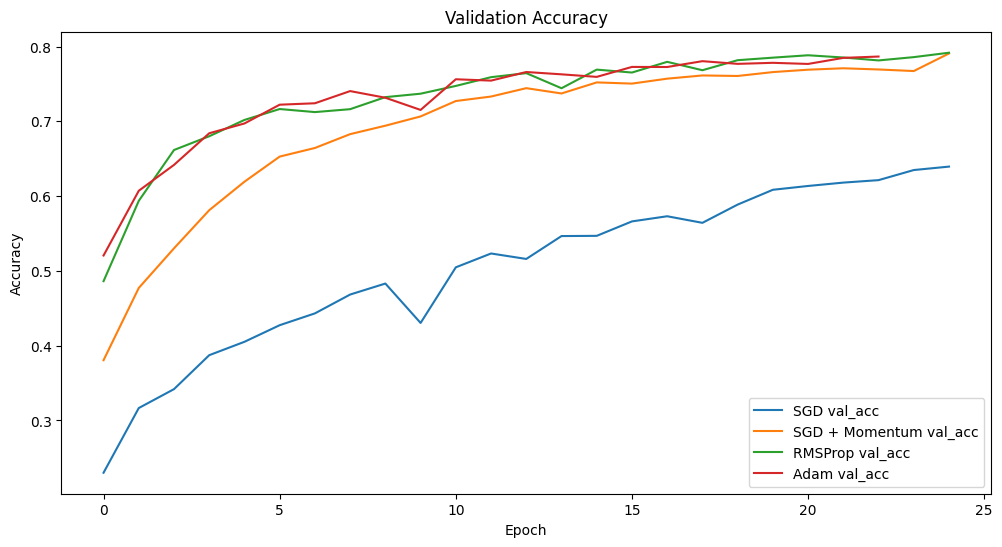

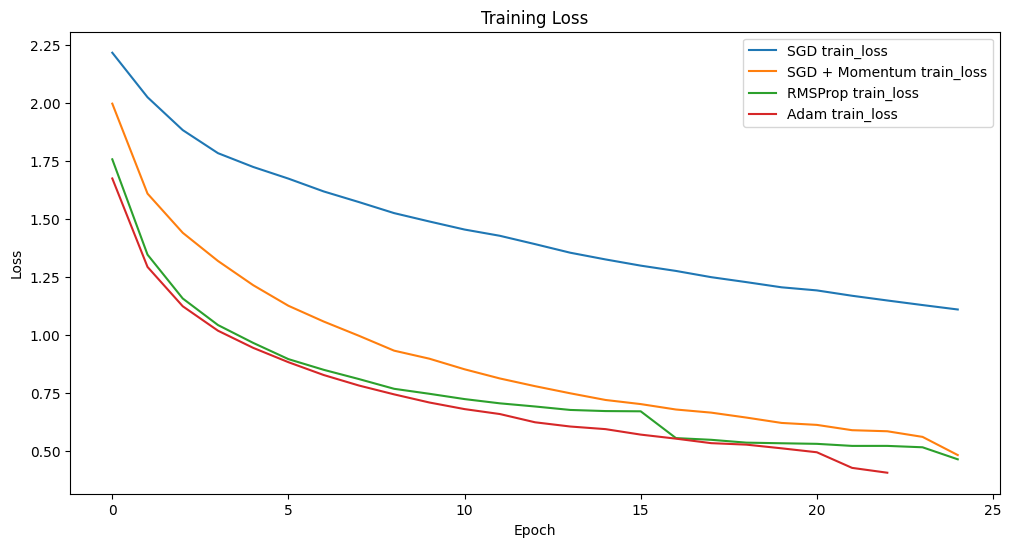

In [17]:
# 7️⃣ Plotting function
def plot_histories(histories):
    # Accuracy
    plt.figure(figsize=(12,6))
    for name, hist in histories.items():
        plt.plot(hist.history['val_accuracy'], label=f'{name} val_acc')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss
    plt.figure(figsize=(12,6))
    for name, hist in histories.items():
        plt.plot(hist.history['loss'], label=f'{name} train_loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_histories(histories)




9. Finding the test accuracy

In [18]:
# 8️⃣ Show test accuracy
for name, acc in results.items():
    print(f"{name} Test Accuracy: {acc:.4f}")

SGD Test Accuracy: 0.6420
SGD + Momentum Test Accuracy: 0.7842
RMSProp Test Accuracy: 0.7788
Adam Test Accuracy: 0.7666
